In [ ]:
Peterson C. de Oliveira

Investigate a dataset.

The Titanic was choosen as the dataset to investigate.

As suggested the most interesting questing to pose should be something related to what factors made people more likely to survive and this will be the question to answer.


In [112]:
from pandas import *
from ggplot import *
import matplotlib.pyplot as plt

%matplotlib inline

titanic = pandas.read_csv('/home/peterson/Udacity/Data_Science/Investigate_a_dataset/titanic_data.csv')

peopleThatSurvived = titanic[titanic.Survived == 1]


#As we do not need the Passenger Id information I decided to remove it from the dataframe.
peopleThatSurvived = peopleThatSurvived.drop('PassengerId', 1)

print 'Summary of the dataset: %s' %peopleThatSurvived.describe()

#The information above shows a problem that will be solved later, a problem with the age of some passengers.



female = titanic[titanic.Sex == 'female']

male = titanic[titanic.Sex == 'male']

print 'Number of survived passengers: %d' % len(peopleThatSurvived)

print 'Number of survived females: %d' % len(female[female.Survived == 1])

print 'Number of survived females: %d' % len(male[male.Survived == 1])

Summary of the dataset:        Survived      Pclass         Age       SibSp       Parch        Fare
count       342  342.000000  290.000000  342.000000  342.000000  342.000000
mean          1    1.950292   28.343690    0.473684    0.464912   48.395408
std           0    0.863321   14.950952    0.708688    0.771712   66.596998
min           1    1.000000    0.420000    0.000000    0.000000    0.000000
25%           1    1.000000   19.000000    0.000000    0.000000   12.475000
50%           1    2.000000   28.000000    0.000000    0.000000   26.000000
75%           1    3.000000   36.000000    1.000000    1.000000   57.000000
max           1    3.000000   80.000000    4.000000    5.000000  512.329200
Number of survived passengers: 342
Number of survived females: 233
Number of survived females: 109


Mean age of the survivors: 28
Max age of the survivors: 80
Min age of the survivors: 0
Standard Deviation of the survivors age: 13
People that survived with NaN age value 0
People that survived with NaN age value after cleaning 0
        Sex
      count
Age        
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      5
2.00      3
3.00      5
4.00      7
5.00      4
6.00      2
7.00      1
8.00      2
9.00      2
11.00     1
12.00     1
13.00     2
14.00     3
15.00     4
16.00     6
17.00     6
18.00     9
19.00     9
20.00     3
21.00     5
22.00    11
23.00     5
24.00    15
25.00     6
26.00     6
...     ...
32.00     9
32.50     1
33.00     6
34.00     6
35.00    11
36.00    11
37.00     1
38.00     5
39.00     5
40.00     6
41.00     2
42.00     6
43.00     1
44.00     3
45.00     5
47.00     1
48.00     6
49.00     4
50.00     5
51.00     2
52.00     3
53.00     1
54.00     3
55.00     1
56.00     2
58.00     3
60.00     2
62.00     2
63.00     2
80.00     1

[

(0.41999999999999998, 80.0)

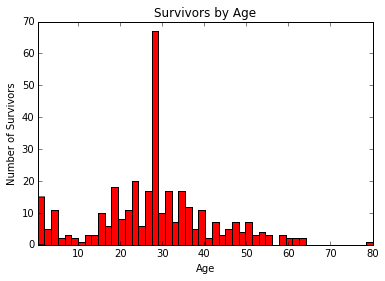

In [107]:
print 'Mean age of the survivors: %d' %peopleThatSurvived.Age.mean()

print 'Max age of the survivors: %d' %peopleThatSurvived.Age.max()

print 'Min age of the survivors: %d' % peopleThatSurvived.Age.min()

print 'Standard Deviation of the survivors age: %d' % peopleThatSurvived.Age.std()

print 'People that survived with NaN age value %d' %len(peopleThatSurvived[peopleThatSurvived.Age.isnull()])

#We have some problem with NaN values for age and to deal with it i set the NaN values to the mean age of the survivors.
peopleThatSurvived = peopleThatSurvived.fillna(peopleThatSurvived.Age.mean());

print 'People that survived with NaN age value after cleaning %d' %len(peopleThatSurvived[peopleThatSurvived.Age.isnull()])

print peopleThatSurvived[['Sex', 'Age']].groupby(['Age']).agg(['count'])

# A histogram of the data of the survivors by age
survived_age_plot = peopleThatSurvived['Age'].plot(kind='hist', stacked=True, bins=50, color='red')
survived_age_plot.set_title("Survivors by Age")
survived_age_plot.set_xlabel("Age")
survived_age_plot.set_ylabel("Number of Survivors")
survived_age_plot.set_xlim([peopleThatSurvived.Age.min(),peopleThatSurvived.Age.max()])



(0.41999999999999998, 80.0)

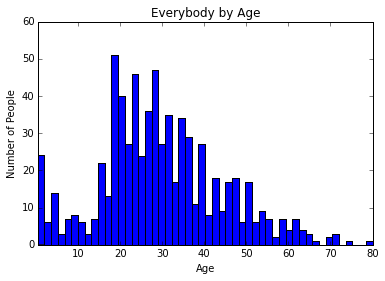

In [87]:
# A histogram of the data of the passengers by age
everybody_age_plot = titanic['Age'].plot(kind='hist', stacked=True, bins=50, color='blue')
everybody_age_plot.set_title("Everybody by Age")
everybody_age_plot.set_xlabel("Age")
everybody_age_plot.set_ylabel("Number of People")
everybody_age_plot.set_xlim([titanic.Age.min(),titanic.Age.max()])

        Name
       count
Pclass      
1        216
2        184
3        491


(1, 3)

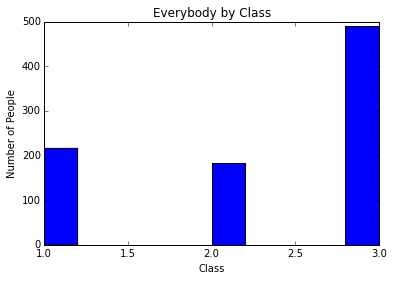

In [104]:
print titanic[['Name', 'Pclass']].groupby(['Pclass']).agg(['count'])


# A histogram of the data of the passengers by class
everybody_class_plot = titanic['Pclass'].plot(kind='hist', stacked=True, bins=10, color='blue')
everybody_class_plot.set_title("Everybody by Class")
everybody_class_plot.set_xlabel("Class")
everybody_class_plot.set_ylabel("Number of People")
everybody_class_plot.set_xlim([titanic.Pclass.min(),titanic.Pclass.max()])


       Survived
          count
Pclass         
1           136
2            87
3           119


(1, 3)

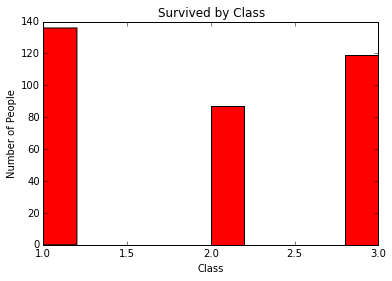

In [88]:
print peopleThatSurvived[['Survived', 'Pclass']].groupby(['Pclass']).agg(['count'])


# A histogram of the data of the survivors by class

survived_class_plot = peopleThatSurvived['Pclass'].plot(kind='hist', stacked=True, bins=10, color='red')
survived_class_plot.set_title("Survived by Class")
survived_class_plot.set_xlabel("Class")
survived_class_plot.set_ylabel("Number of People")
survived_class_plot.set_xlim([peopleThatSurvived.Pclass.min(),peopleThatSurvived.Pclass.max()])



In [99]:
print peopleThatSurvived[['Survived', 'Pclass','Sex']].groupby(['Pclass', 'Sex']).agg(['count'])

              Survived
                 count
Pclass Sex            
1      female       91
       male         45
2      female       70
       male         17
3      female       72
       male         47


From the analysis above it seems that we have a trend in the factors that made people more likely to survive. It seems that females had priority on the lifeboats, as seen on the movies. 

From the dataset we have 891 passengers, which 314 are women and 577 are men. Considering those numbers only 233 women were saved against 109 men, that represents almost 74% of women saved and 18,8% of men. So beeing a woman is a great factor for survive.

Another variable that counts is wealth and from the dataset we have 3 classes - 1st, 2nd and 3rd - that represents Upper, Middle and Lower classes. As we can see from the data below we had more passengers survided from the Upper class. 

Class   #Passenger        
1st         136 - 63%
2nd          87 - 47%
3rd         119 - 24%

      
Class   #Passenger      
1st      216
2nd      184
3rd      491

Our last important factor seems to be age:

And we arrived with the following numbers:

Mean age of the survivors: 28
Max age of the survivors: 80
Min age of the survivors: 0
Standard Deviation of the survivors age: 14

So it seems that women, of an upper class and around 21.00 and 36.00 years old had a better chance to survive.


[1] Kaggle
[2] Udacity